# **Iris Flower Classification using Logistic Regression, Decision Tree, Random Forest and Naive Bayes**
------------------
In this machine learning project, we utilized Logistic Regression, Decision Tree, Random Forest and Naive Bayes, well-known classification methods, to categorize iris flowers based on their unique characteristics. Using the Iris dataset, which includes measurements like sepal length, sepal width, petal length, and petal width, we aimed to classify iris flowers into three distinct classes: Iris-Setosa, Iris-Versicolor, and Iris-Virginica.

## **Step 1: Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns


## **Step 2: Read Dataset**

In [3]:
iris = pd.read_csv('iris.csv')

In [4]:
iris.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,6.9,3.1,4.9,1.5,Iris-versicolor
1,7.2,3.6,6.1,2.5,Iris-virginica
2,5.2,3.5,1.5,0.2,Iris-setosa
3,5.7,4.4,1.5,0.4,Iris-setosa
4,6.0,2.9,4.5,1.5,Iris-versicolor


In [6]:
iris.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
145,5.0,2.3,3.3,1.0,Iris-versicolor
146,7.7,3.0,6.1,2.3,Iris-virginica
147,5.0,3.2,1.2,0.2,Iris-setosa
148,5.7,2.8,4.1,1.3,Iris-versicolor
149,4.5,2.3,1.3,0.3,Iris-setosa


## **Step 3: Sanity Check Of Data**

In [7]:
iris.shape

(150, 5)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   class               150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#finding missing values
iris.isnull().sum()

sepal length in cm    0
sepal width in cm     0
petal length in cm    0
petal width in cm     0
class                 0
dtype: int64

In [10]:
#finding duplicates
iris.duplicated().sum()

3

In [11]:
irisD= iris.drop_duplicates()


In [12]:
irisD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  147 non-null    float64
 1   sepal width in cm   147 non-null    float64
 2   petal length in cm  147 non-null    float64
 3   petal width in cm   147 non-null    float64
 4   class               147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [13]:
#identify garbage value
for i in irisD.select_dtypes(include="object").columns:
    print(irisD[i].value_counts())
    print("***"*10)

class
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64
******************************


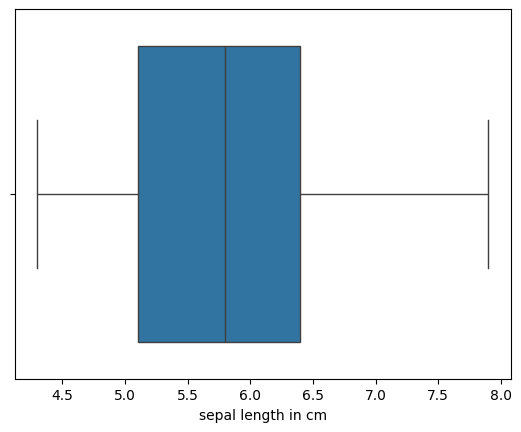

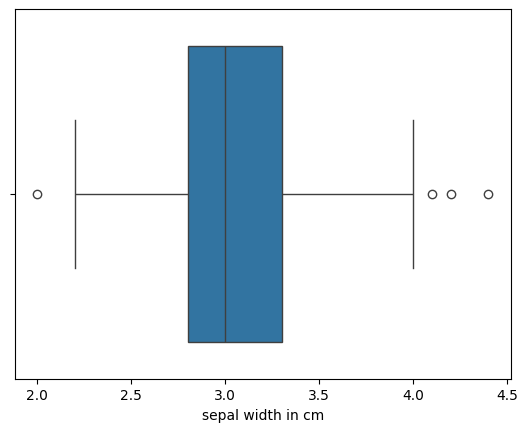

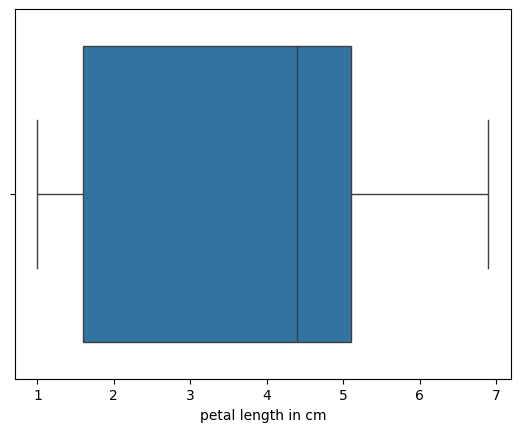

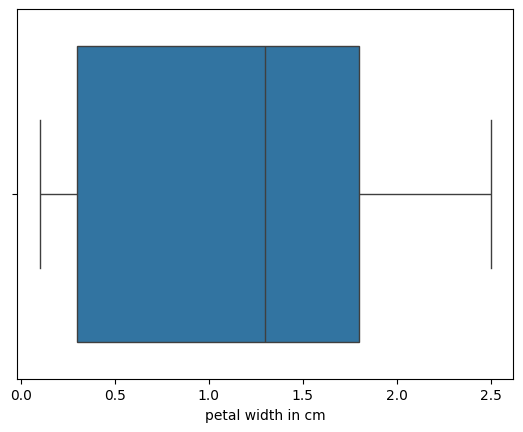

In [14]:
#Box  plot to identify outliers
import warnings
warnings.filterwarnings("ignore")
for i in irisD.select_dtypes(include="number").columns:
    sns.boxplot(data=irisD, x=i)
    plt.show()

In [15]:
irisD.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

## **Step 4: Outlier Treatment**

In [17]:


# Calculate the IQR
Q1 = irisD['sepal width in cm'].quantile(0.25)
Q3 = irisD['sepal width in cm'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
iris_cleaned = irisD[(irisD['sepal width in cm'] >= lower_bound) & (irisD['sepal width in cm'] <= upper_bound)]

# Display the filtered dataset
print(iris_cleaned)


     sepal length in cm  sepal width in cm  petal length in cm  \
0                   6.9                3.1                 4.9   
1                   7.2                3.6                 6.1   
2                   5.2                3.5                 1.5   
4                   6.0                2.9                 4.5   
5                   5.1                3.8                 1.5   
..                  ...                ...                 ...   
145                 5.0                2.3                 3.3   
146                 7.7                3.0                 6.1   
147                 5.0                3.2                 1.2   
148                 5.7                2.8                 4.1   
149                 4.5                2.3                 1.3   

     petal width in cm            class  
0                  1.5  Iris-versicolor  
1                  2.5   Iris-virginica  
2                  0.2      Iris-setosa  
4                  1.5  Iris-versicolor

## **Step 5: Save the cleaned dataset**

In [18]:
# Example: Save the cleaned DataFrame to a new CSV file
iris_cleaned.to_csv('iris_dataset_cleaned.csv', index=False)


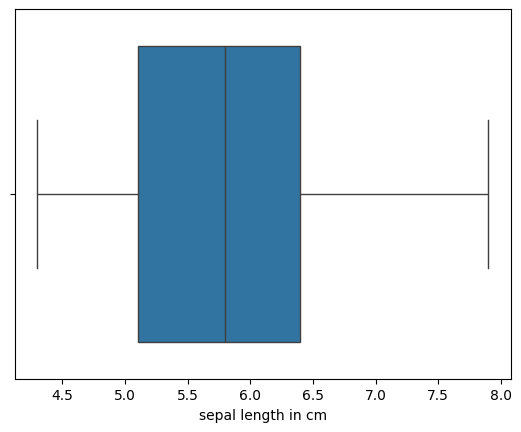

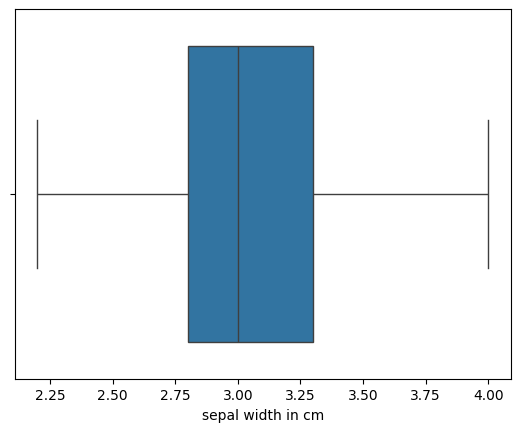

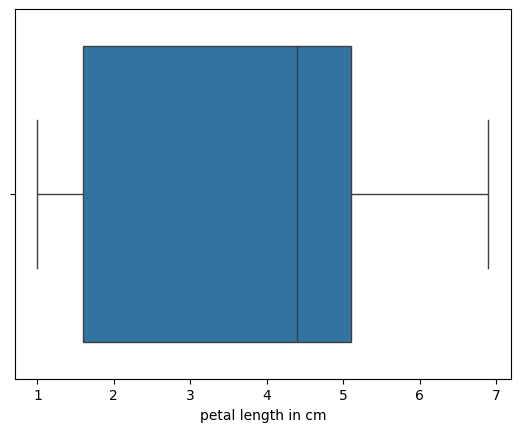

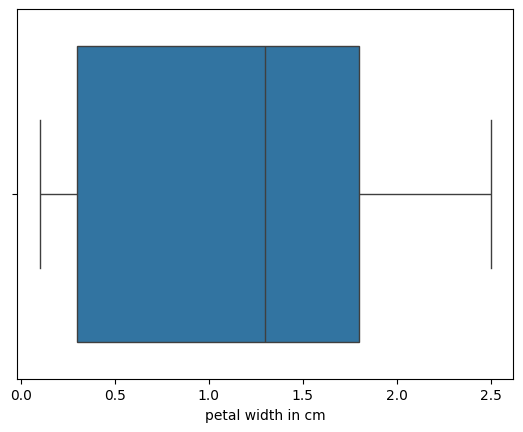

In [19]:
#code to plot boxplot showing no more outliers

for i in iris_cleaned.select_dtypes(include="number").columns:
    sns.boxplot(data=iris_cleaned, x=i)
    plt.show()

## **Step 6: Transforming class variable to numeric**

In [22]:
# Label encoding 
labels = {'Iris-versicolor' : 0,'Iris-virginica' : 1,'Iris-setosa' : 2}
iris_cleaned['class'] = iris['class'].replace(labels)

## **Step 7: Split the dataset and convert to pandas dataframes**

In [23]:
iris_cleaned.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,6.9,3.1,4.9,1.5,0
1,7.2,3.6,6.1,2.5,1
2,5.2,3.5,1.5,0.2,2
4,6.0,2.9,4.5,1.5,0
5,5.1,3.8,1.5,0.3,2


In [25]:
#Split into features and labels
# Features (X) and Labels (y)
X = iris_cleaned.drop(columns='class')
y = iris_cleaned['class']

from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Convert to pandas DataFrames (this step is redundant as train_test_split already returns pandas DataFrames)
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['class'])
y_test = pd.DataFrame(y_test, columns=['class'])

# Verify the shapes
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')



X_train shape: (107, 4)
y_train shape: (107, 1)
X_test shape: (36, 4)
y_test shape: (36, 1)


# **Algorithm 1: Logistic Regression**

In [26]:
# Select the model
from sklearn.linear_model import LogisticRegression 
logit = LogisticRegression(max_iter=1000,multi_class = 'ovr')

# Train the model with Training data
logit.fit(X_train,y_train)

LogisticRegression(max_iter=1000, multi_class='ovr')

In [55]:
# Predictions on Testing Data
y_pred = logit.predict(X_test)

#Model Accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Confusion matrix 
cm = confusion_matrix(y_pred,y_test)
print("Logistic regression Confusion matrix:") 
print(cm)

# Classification Report 
cr = classification_report(y_pred,y_test)
print("Classification Report")
print(cr)

# Accuracy Score
a_s = accuracy_score(y_pred,y_test)
print("Logistic Regression Accuracy Score: %.2f"%((a_s)*100),'%')

Logistic regression Confusion matrix:
[[12  1  0]
 [ 1 11  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12
           2       1.00      1.00      1.00        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.94      0.94      0.94        36

Logistic Regression Accuracy Score: 94.44 %


# **Algorithm 2: Decision Tree**

### **The dataset has already been read, and the features explored, so we move straight to Decision Tree**

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of DecisionTreeClassifier with default parameters
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

#Model Accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Accuracy Score
dt_a_s = accuracy_score(y_pred,y_test)
print("Decision Tree Accuracy Score: %.2f"%((dt_a_s)*100),'%')

# Confusion matrix 
dtcm = confusion_matrix(y_pred,y_test)
print("Decision Tree Confusion Matrix:") 
print(dtcm)

# Classification Report 
dtcr = classification_report(y_pred,y_test)
print("Classification Report")
print(dtcr)


Decision Tree Accuracy Score: 91.67 %
Decision Tree Confusion Matrix:
[[12  2  0]
 [ 1 10  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.83      0.91      0.87        11
           2       1.00      1.00      1.00        11

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



# **Algorithm 3: Random Forest - Default Parameters**

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier with default parameters
forest = RandomForestClassifier(random_state=42)

# Train the model
forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = forest.predict(X_test)

#Model Accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Accuracy Score
rf_a_s = accuracy_score(y_pred,y_test)
print("Random Forest Accuracy Score: %.2f"%((rf_a_s)*100),'%')

# Confusion matrix 
rfcm = confusion_matrix(y_pred,y_test)
print("Random Forest Confusion Matrix:") 
print(rfcm)

# Classification Report 
rfcr = classification_report(y_pred,y_test)
print("Classification Report")
print(rfcr)

Random Forest Accuracy Score: 97.22 %
Random Forest Confusion Matrix:
[[13  1  0]
 [ 0 11  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



# **Random Forest - Custom Parameters**

In [57]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of RandomForestClassifier with custom parameters
forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = forest.predict(X_test)

#Model Accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Accuracy Score
rf_a_s = accuracy_score(y_pred,y_test)
print("Random Forest Accuracy Score: %.2f"%((rf_a_s)*100),'%')

# Confusion matrix 
rfcm = confusion_matrix(y_pred,y_test)
print("Random Forest Confusion Matrix:") 
print(rfcm)

# Classification Report 
rfcr = classification_report(y_pred,y_test)
print("Classification Report")
print(rfcr)

Random Forest Accuracy Score: 97.22 %
Random Forest Confusion Matrix:
[[13  1  0]
 [ 0 11  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



# **Algorithm 4: Naive Bayes**

In [58]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of GaussianNB
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb.predict(X_test)

#Model Accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Accuracy Score
nb_a_s = accuracy_score(y_pred,y_test)
print("Naive Bayes Accuracy Score: %.2f"%((nb_a_s)*100),'%')

# Confusion matrix 
nbcm = confusion_matrix(y_pred,y_test)
print("Naive Bayes Confusion Matrix:") 
print(nbcm)

# Classification Report 
nbcr = classification_report(y_pred,y_test)
print("Classification Report")
print(nbcr)

Naive Bayes Accuracy Score: 97.22 %
Naive Bayes Confusion Matrix:
[[13  1  0]
 [ 0 11  0]
 [ 0  0 11]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



### **--End of Project--**